# Simple Sorting

The **insertion sort** algorithm takes each value in an array and swaps it to the left as long as there is a larger value to the left.

In [1]:
# This function sorts an array.
# The algortihm is O(n^2) where n = len(array).
def insertion_sort(array):
     for i in range(len(array)): # Take each value
            j = i # j will be where array[i] belongs
            while j > 0 and array[j] < array[j-1]:        
                array[j], array[j-1] = array[j-1], array[j]
                j = j - 1
                

In [5]:
# This function prints something if a sorting function fails.
def tester(sort):
    array = random_array()
    correct = sorted(array)
    sort(array)
    if array != correct:
        print("Error sorting", array, "with", sort)

The **selection sort** algorithm takes each value in an array and swaps it with the smallest value to the right.

In [15]:
# This function sorts an array.
# The algorithm is O(n^2) where n = len(array).
def selection_sort(array):
    for i in range(len(array)):
        smallest = i
        for j in range(i, len(array)):
            if array[j] < array[smallest]:
                smallest = j
        array[i], array[smallest] = array[smallest], array[i]

Let's do some testing.

In [13]:
# This function creates and returns a small randomized array.
from random import randrange
def random_array():
    array = []
    n = randrange(20)
    while len(array) < n:
        array.append(randrange(20))
    return array

In [14]:
# This code should have no output
for test in range(100):
    tester(insertion_sort)
    tester(selection_sort)

Now let's compare the timing

In [17]:
# This function times a sorting function on a range of problem sizes.
def timer(sort, lengths, reverse=False):
    times = []
    for n in lengths:
        array = list(range(n))
        if reverse:
            array.reverse()
        time = %timeit -n1 -r1 -o -q sort(array)
        times.append(time.average)
    return times

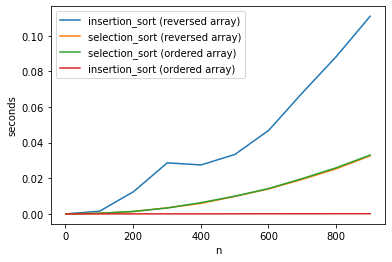

In [32]:
# This code plots some search times.
from matplotlib import pyplot
from numpy import arange

n = arange(1, 1000, 100)

pyplot.plot(n, timer(insertion_sort, n, True), label="insertion_sort (reversed array)")
pyplot.plot(n, timer(selection_sort, n), label="selection_sort (reversed array)")
pyplot.plot(n, timer(selection_sort, n, True), label="selection_sort (ordered array)")
pyplot.plot(n, timer(insertion_sort, n), label="insertion_sort (ordered array)")

pyplot.ylabel("seconds")
pyplot.xlabel("n")
pyplot.legend()
pyplot.show()

These $O(n^2)$ sorting algorithms have situational strengths.
- On mostly unsorted arrays, selection sort has a smaller constant multiplier because it does fewer swaps.
- On mostly sorted arrays, insertion sort behaves more like $O(n)$ because it skips most of the inner loop.